# Flight Price prediction (EDA + Feature Engineering)


In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import datetime
%matplotlib inline

In [12]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

In [13]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
df_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [15]:
df=pd.concat([df_train,df_test],ignore_index=True)

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [17]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [19]:
df['Date']=df.Date_of_Journey.apply(lambda x: int(x.split("/")[0]))
df['Month']=df.Date_of_Journey.apply(lambda x: int(x.split("/")[1]))
df['Year']=df.Date_of_Journey.apply(lambda x: int(x.split("/")[2]))

In [20]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [24]:
crowdingdata=df.groupby(['Date_of_Journey','Source']).size().reset_index()

In [25]:
df=df.drop('Date_of_Journey',axis=1)

In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [27]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x: x.split(" ")[0])

In [28]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019


In [29]:
df['Arrival_Hour']=df['Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Arrival_Minute']=df['Arrival_Time'].apply(lambda x: int(x.split(':')[1]))
df['Dep_Hour']=df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))
df['Dep_Minute']=df['Dep_Time'].apply(lambda x: int(x.split(':')[1]))
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [30]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30
13350,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,6,3,2019,4,25,21,50
13352,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,4,0


In [31]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
dtype: int64

In [32]:
df=df[~df['Route'].isnull()]

In [33]:
df.shape

(13353, 15)

In [34]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
dtype: int64

In [35]:
df.Duration.apply(lambda x: int(x.split(' ')[0].replace('h','')))

ValueError: invalid literal for int() with base 10: '5m'

In [ ]:
df=df[df['Duration']!='5m']

In [ ]:
df['Duration_Hours']=df.Duration.apply(lambda x: int(x.split(' ')[0].replace('h','')))
df['Duration_Min']=df.Duration.apply(lambda x: 0 if len(x.split(' '))!=2 else int(x.split(' ')[1].replace('m','')))

In [36]:
df.drop('Duration',axis=1,inplace=True)

/var/folders/3w/m4782sy17fn0bs3fw1r9mtz00000gn/T/ipykernel_48771/3134674127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Duration',axis=1,inplace=True)


In [37]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,2019,21,35,16,50


## Visualizations

     Source     0
0  Banglore  2752
1   Chennai   456
2     Delhi  5681
3   Kolkata  3581
4    Mumbai   883
['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']


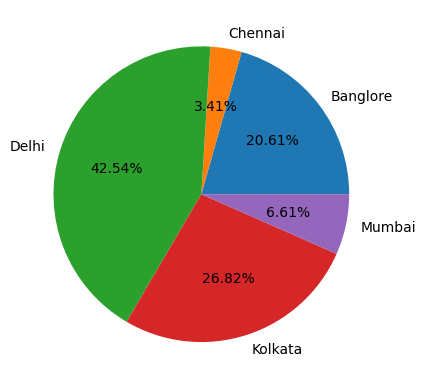

In [38]:
planes_from_destination=df.groupby(['Source']).size().reset_index()
print(planes_from_destination)
planes_from_destination=planes_from_destination.rename(columns={0:'count'})
print(list(planes_from_destination.Source))
plt.pie(x=planes_from_destination['count'], 
        labels=planes_from_destination['Source'], 
        autopct='%1.2f%%')
plt.show()

['DEL → BOM → COK', 'BLR → DEL', 'CCU → BOM → BLR', 'CCU → BLR', 'BOM → HYD', 'CCU → DEL → BLR', 'BLR → BOM → DEL', 'MAA → CCU', 'DEL → HYD → COK', 'DEL → JAI → BOM → COK', 'DEL → BLR → COK', 'DEL → COK', 'DEL → AMD → BOM → COK', 'DEL → MAA → COK', 'DEL → IDR → BOM → COK', 'DEL → HYD → MAA → COK', 'DEL → NAG → BOM → COK', 'CCU → HYD → BLR', 'CCU → MAA → BLR', 'DEL → GOI → BOM → COK', 'DEL → HYD → BOM → COK', 'CCU → BBI → BLR', 'DEL → CCU → BOM → COK', 'DEL → BHO → BOM → COK', 'CCU → IXR → DEL → BLR', 'CCU → BBI → BOM → BLR', 'DEL → ATQ → BOM → COK', 'DEL → PNQ → COK', 'CCU → GAU → DEL → BLR', 'CCU → DEL → COK → BLR', 'DEL → LKO → BOM → COK', 'CCU → GAU → BLR', 'BLR → HYD → DEL', 'BOM → DEL → HYD', 'DEL → JDH → BOM → COK', 'CCU → BOM → COK → BLR', 'DEL → BDQ → BOM → COK', 'BLR → MAA → DEL', 'CCU → DEL → AMD → BLR', 'DEL → AMD → COK', 'CCU → IXB → BLR', 'BLR → AMD → DEL', 'CCU → BOM → GOI → BLR', 'CCU → PNQ → BLR', 'DEL → LKO → COK', 'DEL → UDR → BOM → COK', 'DEL → MAA → BOM → COK', 'DEL

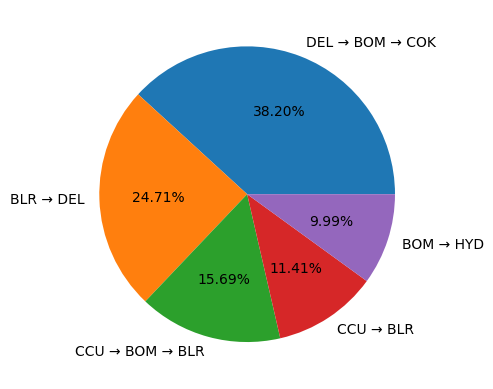

In [39]:
ROUTES=df.groupby(['Route']).size().reset_index()
ROUTES=ROUTES.rename(columns={0:'count'}).sort_values(by='count', ascending=False)
print(list(ROUTES.Route))
print(ROUTES)
plt.pie(x=ROUTES['count'][:5], 
       labels=ROUTES['Route'][:5], 
        autopct='%1.2f%%')
plt.show()

In [40]:
Airlinepresence=df.groupby(['Airline','Source']).size().reset_index()
Airlinepresence=Airlinepresence.rename(columns={0: 'Flights'})

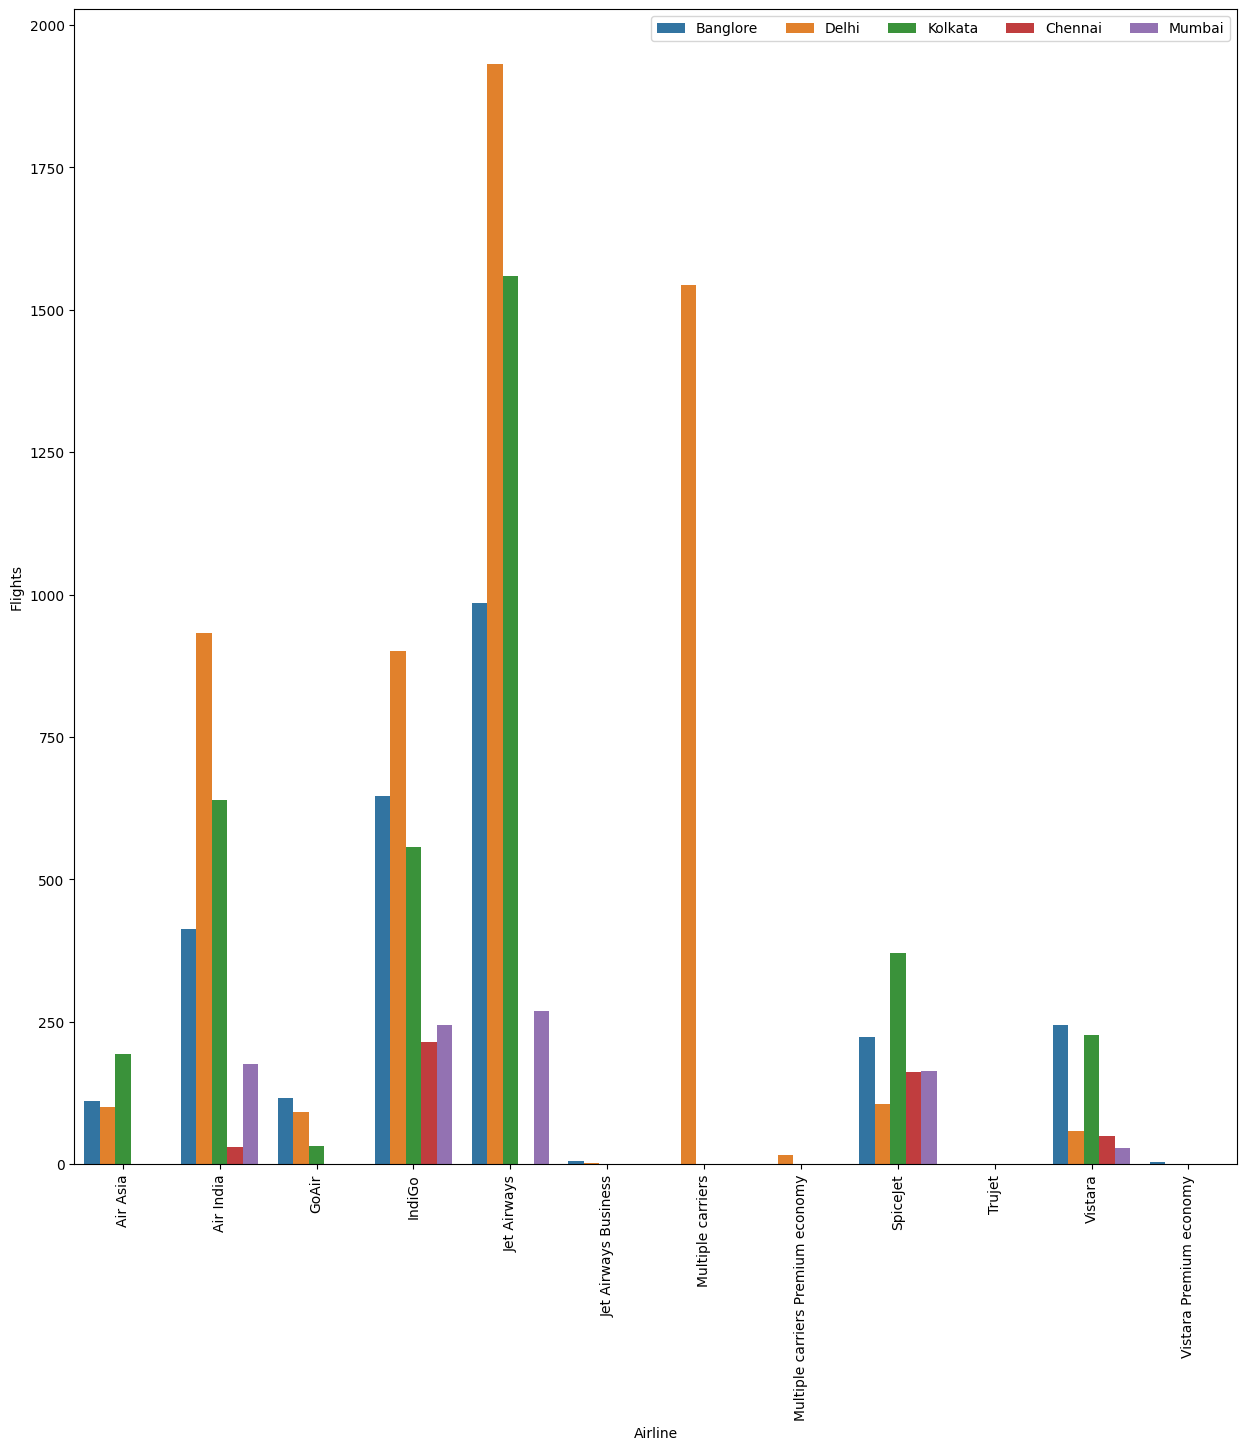

In [41]:
from matplotlib import lines
plt.figure(figsize=(15,15))
sns.barplot(x='Airline',y='Flights',hue='Source',data=Airlinepresence,)
plt.legend(loc="upper right", ncol=len(df.columns))

plt.xticks(rotation=90)
plt.show()

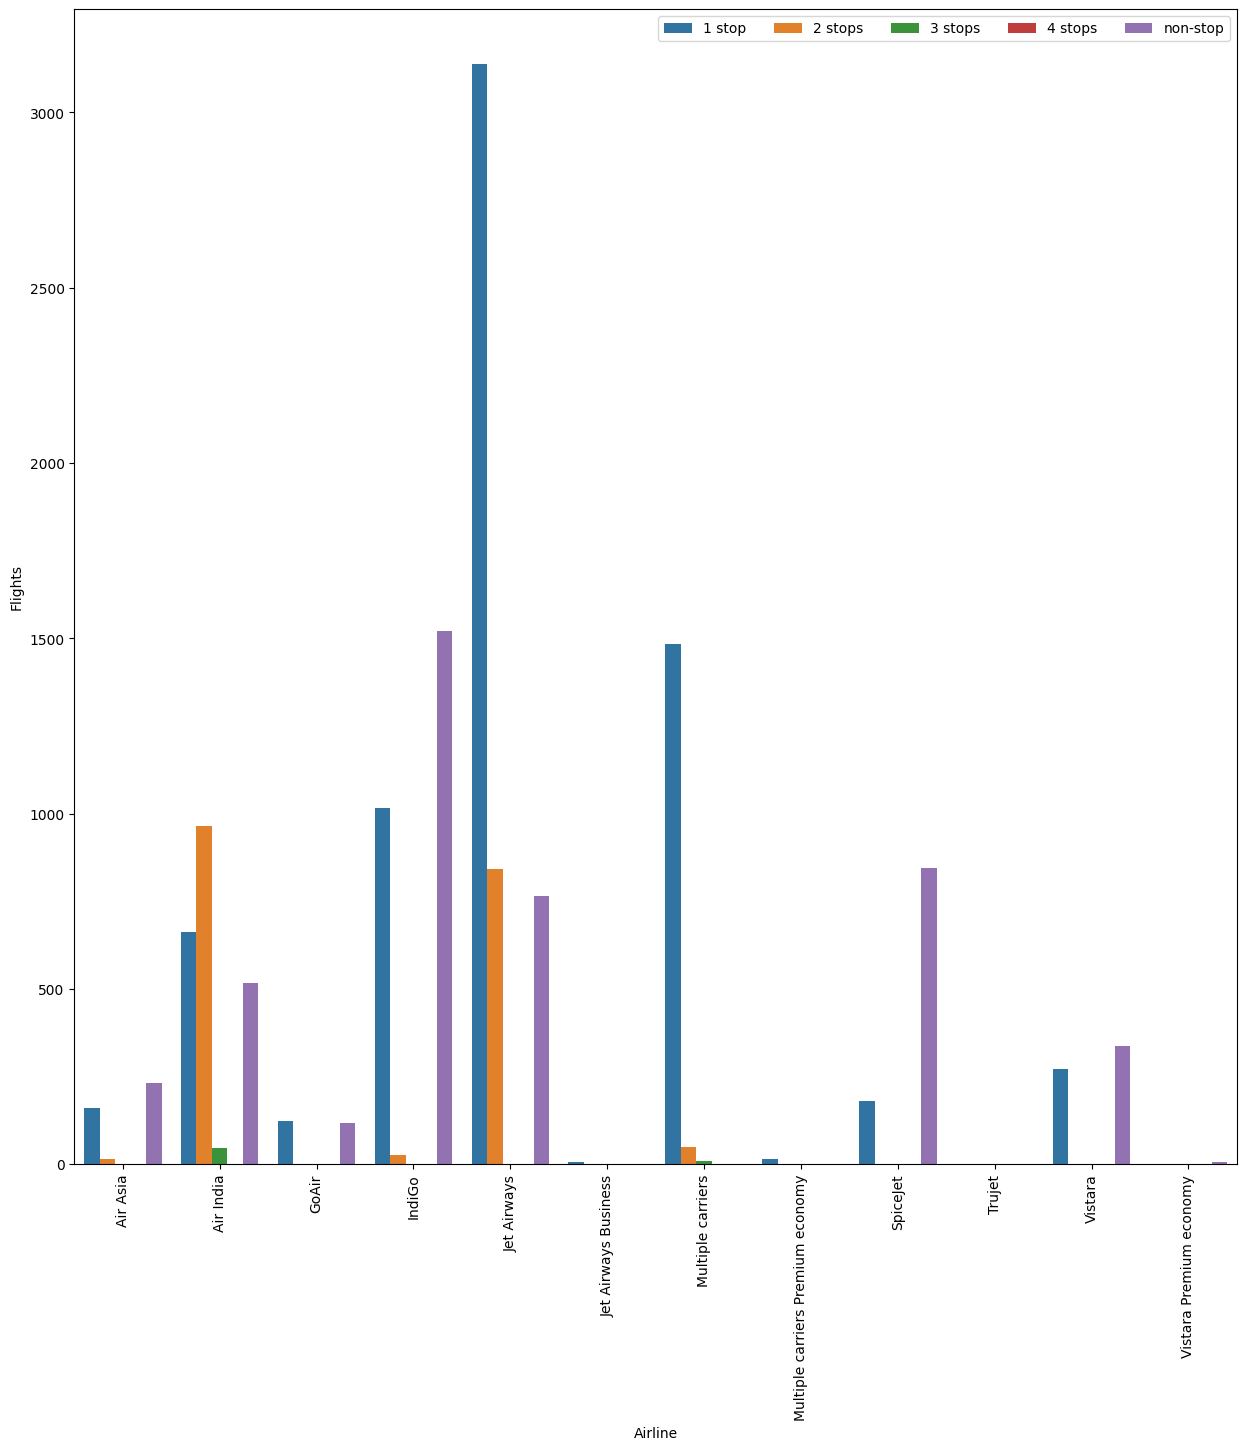

In [42]:
Airlinestops=df.groupby(['Total_Stops','Airline']).size().reset_index()
Airlinestops=Airlinestops.rename(columns={0: 'Flights'})
plt.figure(figsize=(15,15))
sns.barplot(x='Airline',y='Flights',hue='Total_Stops',data=Airlinestops)
plt.legend(loc="upper right", ncol=len(df.columns))

plt.xticks(rotation=90)
plt.show()

39


(array([17956., 17970., 17987., 18001., 18017., 18031., 18048., 18062.,
        18078.]),
 [Text(17956.0, 0, '2019-03-01'),
  Text(17970.0, 0, '2019-03-15'),
  Text(17987.0, 0, '2019-04-01'),
  Text(18001.0, 0, '2019-04-15'),
  Text(18017.0, 0, '2019-05-01'),
  Text(18031.0, 0, '2019-05-15'),
  Text(18048.0, 0, '2019-06-01'),
  Text(18062.0, 0, '2019-06-15'),
  Text(18078.0, 0, '2019-07-01')])

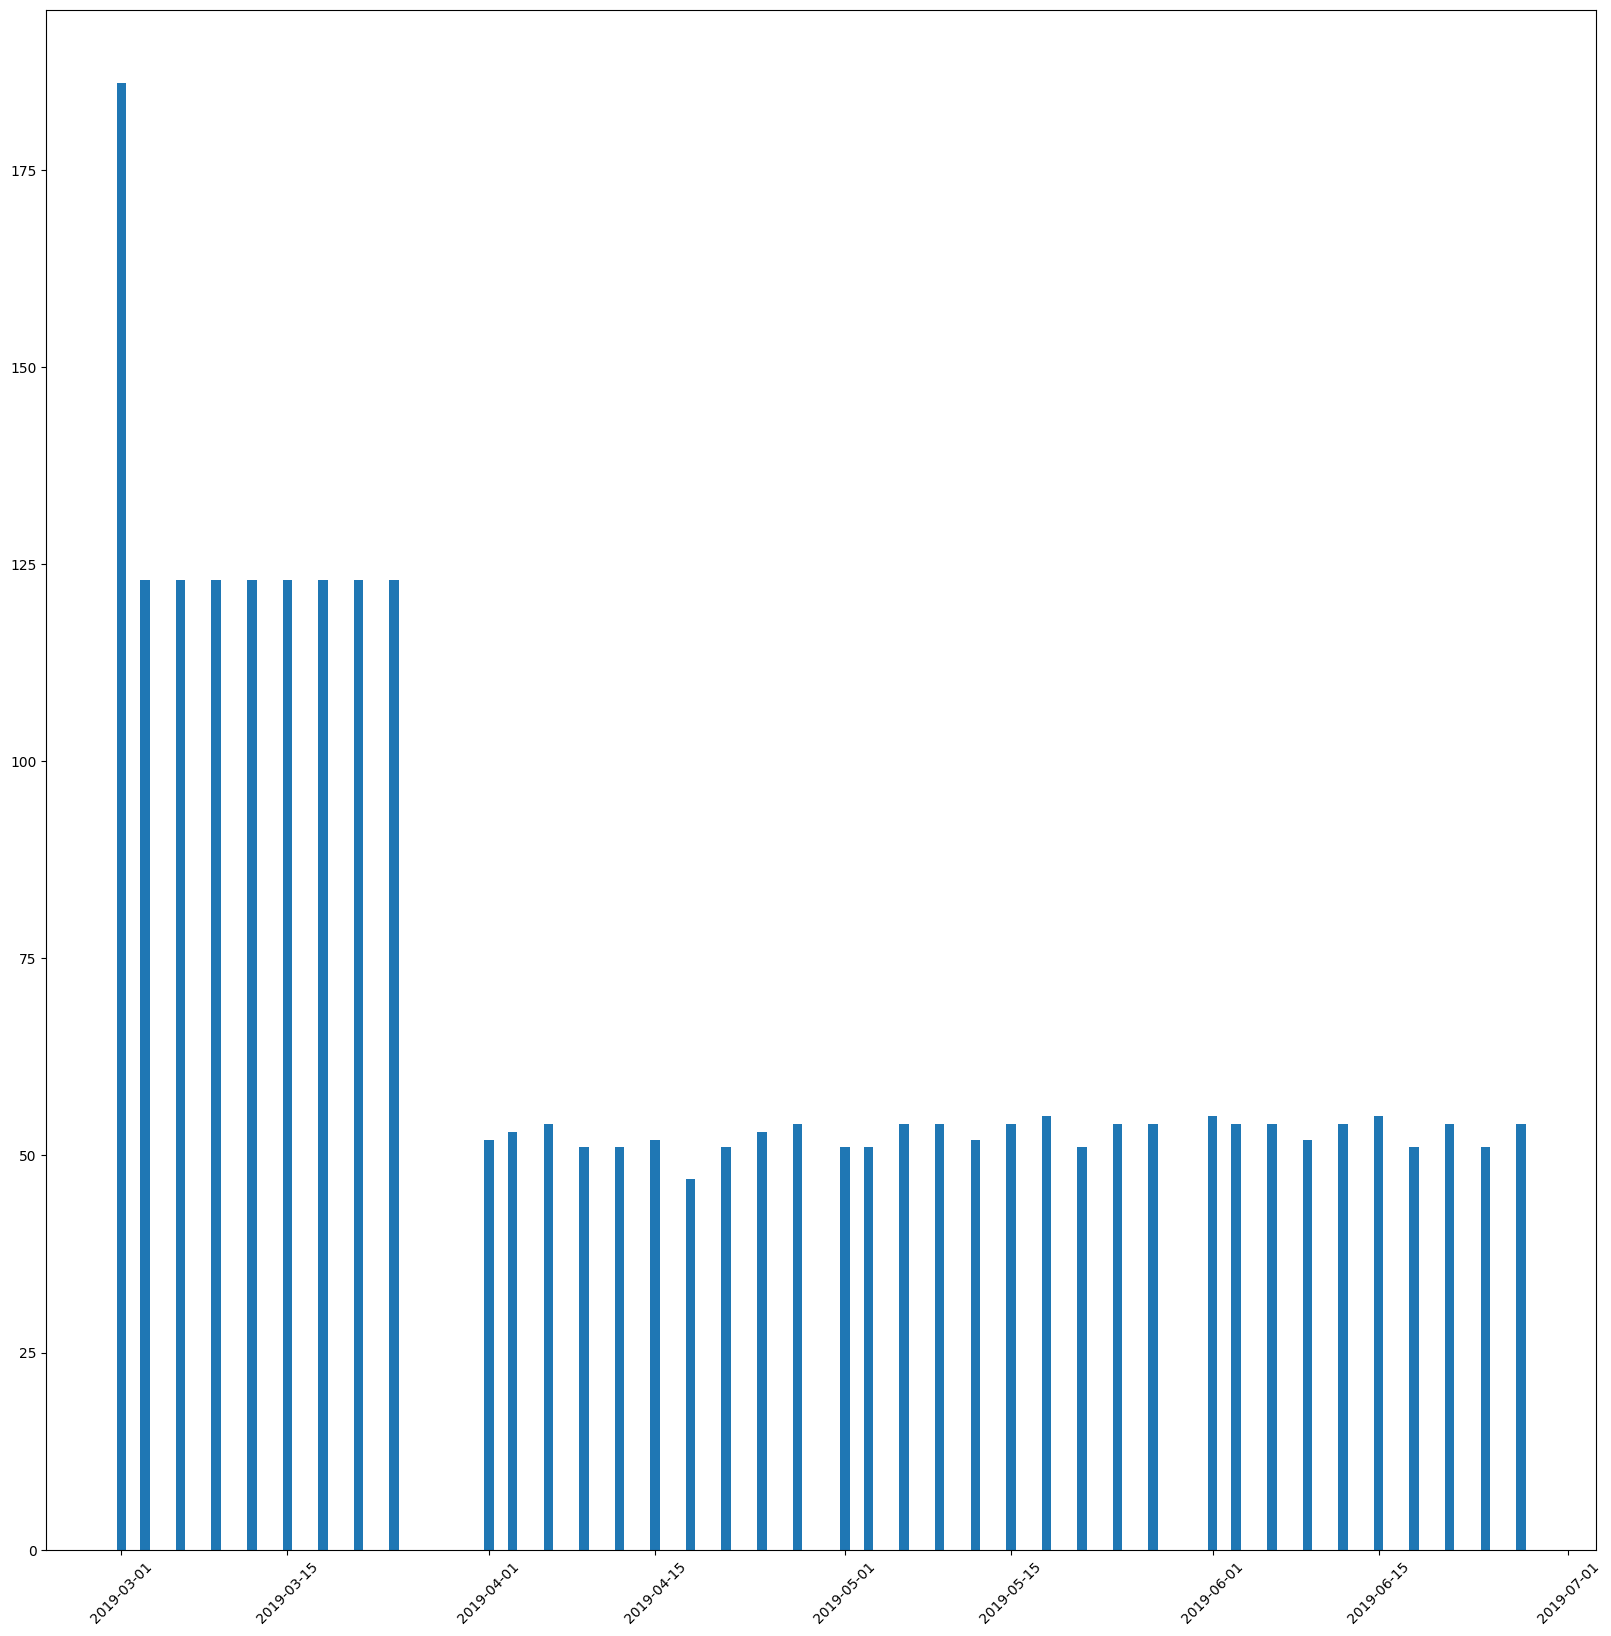

In [94]:
data=crowdingdata[crowdingdata.Source=='Banglore']
data=data.rename(columns={0:'Flights'})
data.Date_of_Journey=data.Date_of_Journey.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y'))
data.sort_values(by='Date_of_Journey')
print(len(data))
plt.figure(figsize=(20,20))
plt.bar(data.Date_of_Journey, data.Flights)
plt.xticks(rotation=45)

# Label Encoding 

In [43]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [44]:
d={}
l=list(df.Airline.unique())
for i in range(len(l)):
    d[l[i]]=i
df['Airline']=df['Airline'].map(d)

/var/folders/3w/m4782sy17fn0bs3fw1r9mtz00000gn/T/ipykernel_48771/533755868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airline']=df['Airline'].map(d)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  int64  
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Total_Stops      13353 non-null  object 
 5   Additional_Info  13353 non-null  object 
 6   Price            10682 non-null  float64
 7   Date             13353 non-null  int64  
 8   Month            13353 non-null  int64  
 9   Year             13353 non-null  int64  
 10  Arrival_Hour     13353 non-null  int64  
 11  Arrival_Minute   13353 non-null  int64  
 12  Dep_Hour         13353 non-null  int64  
 13  Dep_Minute       13353 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.5+ MB


In [46]:
print(list(df.Source.unique()))
print(list(df.Destination.unique()))

['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Source=le.fit_transform(df.Source)
df.Destination=le.fit_transform(df.Destination)
df.Route=le.fit_transform(df.Route)
df.Additional_Info=le.fit_transform(df.Additional_Info)

/var/folders/3w/m4782sy17fn0bs3fw1r9mtz00000gn/T/ipykernel_48771/3836163095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Source=le.fit_transform(df.Source)
/var/folders/3w/m4782sy17fn0bs3fw1r9mtz00000gn/T/ipykernel_48771/3836163095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Destination=le.fit_transform(df.Destination)
/var/folders/3w/m4782sy17fn0bs3fw1r9mtz00000gn/T/ipykernel_48771/3836163095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [48]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [49]:
df['Total_Stops']=df.Total_Stops.map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

/var/folders/3w/m4782sy17fn0bs3fw1r9mtz00000gn/T/ipykernel_48771/262381857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Stops']=df.Total_Stops.map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})


In [50]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,0,0,5,18,0,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,87,2,8,7662.0,1,5,2019,13,15,5,50


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  int64  
 1   Source           13353 non-null  int64  
 2   Destination      13353 non-null  int64  
 3   Route            13353 non-null  int64  
 4   Total_Stops      13353 non-null  int64  
 5   Additional_Info  13353 non-null  int64  
 6   Price            10682 non-null  float64
 7   Date             13353 non-null  int64  
 8   Month            13353 non-null  int64  
 9   Year             13353 non-null  int64  
 10  Arrival_Hour     13353 non-null  int64  
 11  Arrival_Minute   13353 non-null  int64  
 12  Dep_Hour         13353 non-null  int64  
 13  Dep_Minute       13353 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.5 MB


# Data Spliting and preparation for training model

In [326]:
df_train=df[~df['Price'].isnull()]
df_test=df[df['Price'].isnull()]

In [331]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration_Hours',
       'Duration_Min'],
      dtype='object')

In [332]:
print(df_train.shape)
print(df_test.shape)
X=df_train[['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration_Hours',
       'Duration_Min']]
Y=df_train['Price']

(10681, 16)
(2670, 16)


In [334]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [335]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)